In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
!which python

/Applications/anaconda3/envs/mtk/bin/python


In [2]:
from musicntwrk import musicntwrk

In [3]:
mk = musicntwrk.musicntwrk(TET=12)

In [8]:
mk.harmony(descriptor='calc')

In [4]:
mk.harmony(descriptor='tonnentz',x=4,y=3)

,,,,,,,,,
0,0,,1,,2,,3,,4
0,,9,,10,,11,,0,
0,5,,6,,7,,8,,9
0,,2,,3,,4,,5,
0,10,,11,,0,,1,,2
0,,7,,8,,9,,10,
0,3,,4,,5,,6,,7
0,,0,,1,,2,,3,
0,8,,9,,10,,11,,0


In [3]:
bwv1047 = '/Users/marco/Dropbox (Personal)/Musica/MUSICNTWRK/TESTS/BWV1047-Allegro.mxl'
score,orch,num = mk.dictionary(space='orch',scorefil=bwv1047)

In [3]:
wavpath = '/Users/marco/Dropbox (Personal)/Musica/Applications/DATABASES/ImpactSounds/650sons'
waves,mfcc0,mfcc = mk.timbre(descriptor='MFCC',path=wavpath,wavefil='plastique*.wav',
                             nmel=13,ncc=13,standard=False,zero=True)

In [3]:
wavpath = '/Users/marco/Dropbox (Personal)/Musica/Applications/DATABASES/ImpactSounds/650sons'
waves,mfcc0,lmax = mk.timbre(descriptor='MFCC',path=wavpath,wavefil='plastique*.wav',
                             nmel=13,ncc=13,standard=True,nbins=64,lmax=220500)

In [3]:
wavpath = '/Users/marco/Dropbox (Personal)/Musica/Applications/DATABASES/ImpactSounds/650sons'
waves,ascbw = mk.timbre(descriptor='ASCBW',path=wavpath,wavefil='plastique*.wav')

In [3]:
wavpath = '/Users/marco/Dropbox (Personal)/Musica/Applications/DATABASES//WoodMetalGlass/'
waves,ascbw,ascbwu = mk.timbre(descriptor='ASCBW',path=wavpath,wavefil='b4_v4_09.wav',
                        method='MC',scnd=True,nstep=500,standard=True)

sound is  ['/Users/marco/Dropbox (Personal)/Musica/Applications/DATABASES//WoodMetalGlass/b4_v4_09.wav']
primary decay constant   =  0.122
secondary decay constant =  0.217
spectral centroid        =  2550
bandwidth                =  2493


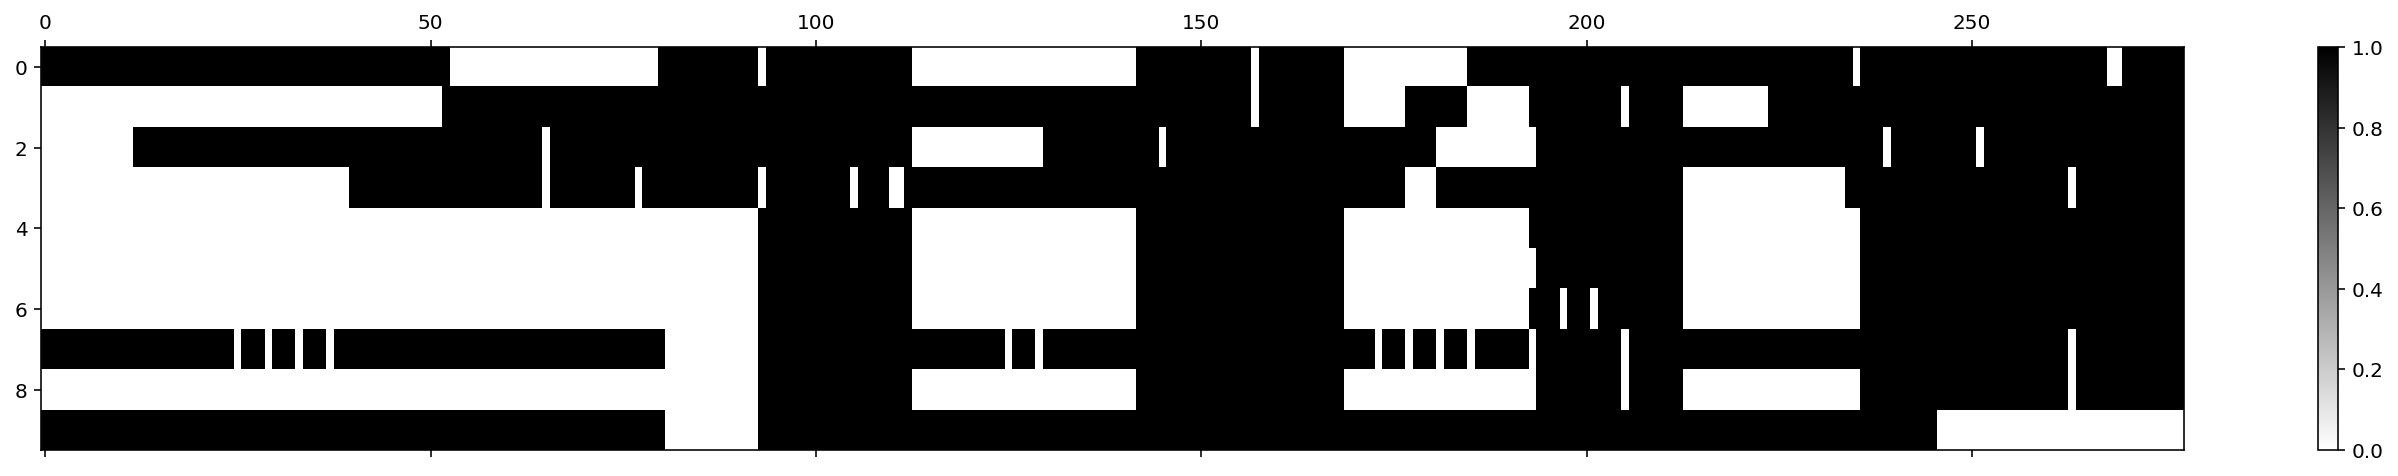

In [4]:
import matplotlib.pyplot as plt
from musicntwrk.plotting.barplot import barplot
barplot(orch,colormap=plt.cm.binary,flip=False)

In [13]:
nodes,edges,deg,modul,part = mk.network(space='orch',seq=orch,distance='euclidean')

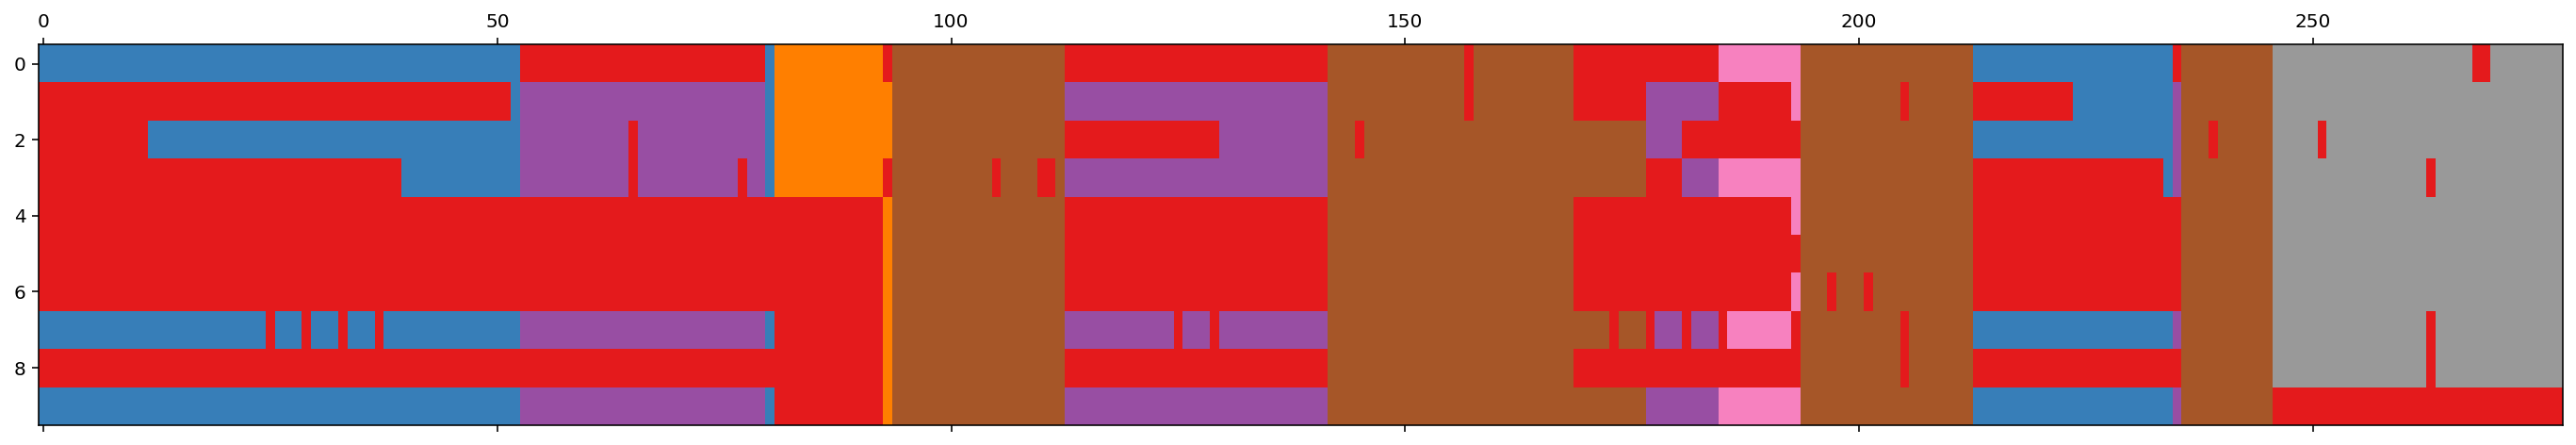

In [23]:
import matplotlib.pyplot as plt
from musicntwrk.networks.orchestralVectorColor import orchestralVectorColor
orchestralVectorColor(orch,nodes,part,color=plt.cm.Set1)

In [9]:
deg

2.1724137931034484

In [6]:
nodes,edges = mk.network(space='timbre',wavefil=waves,cepstrum=mfcc0,thup=2.50,thdw=0.1)

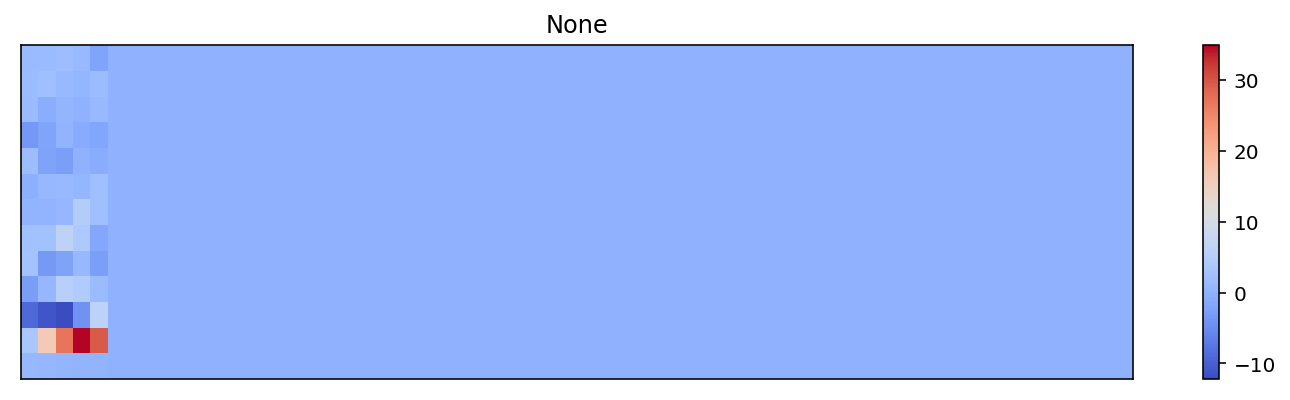

In [4]:
from musicntwrk.plotting.plotCC import plotCC
plotCC(mfcc0[0])

In [3]:
import music21 as m21
bachChorale = m21.corpus.parse('bwv66.6').corpusFilepath
seq,chords,dictscore = mk.dictionary(space='score',scorefil=bachChorale,music21=True,show=False)

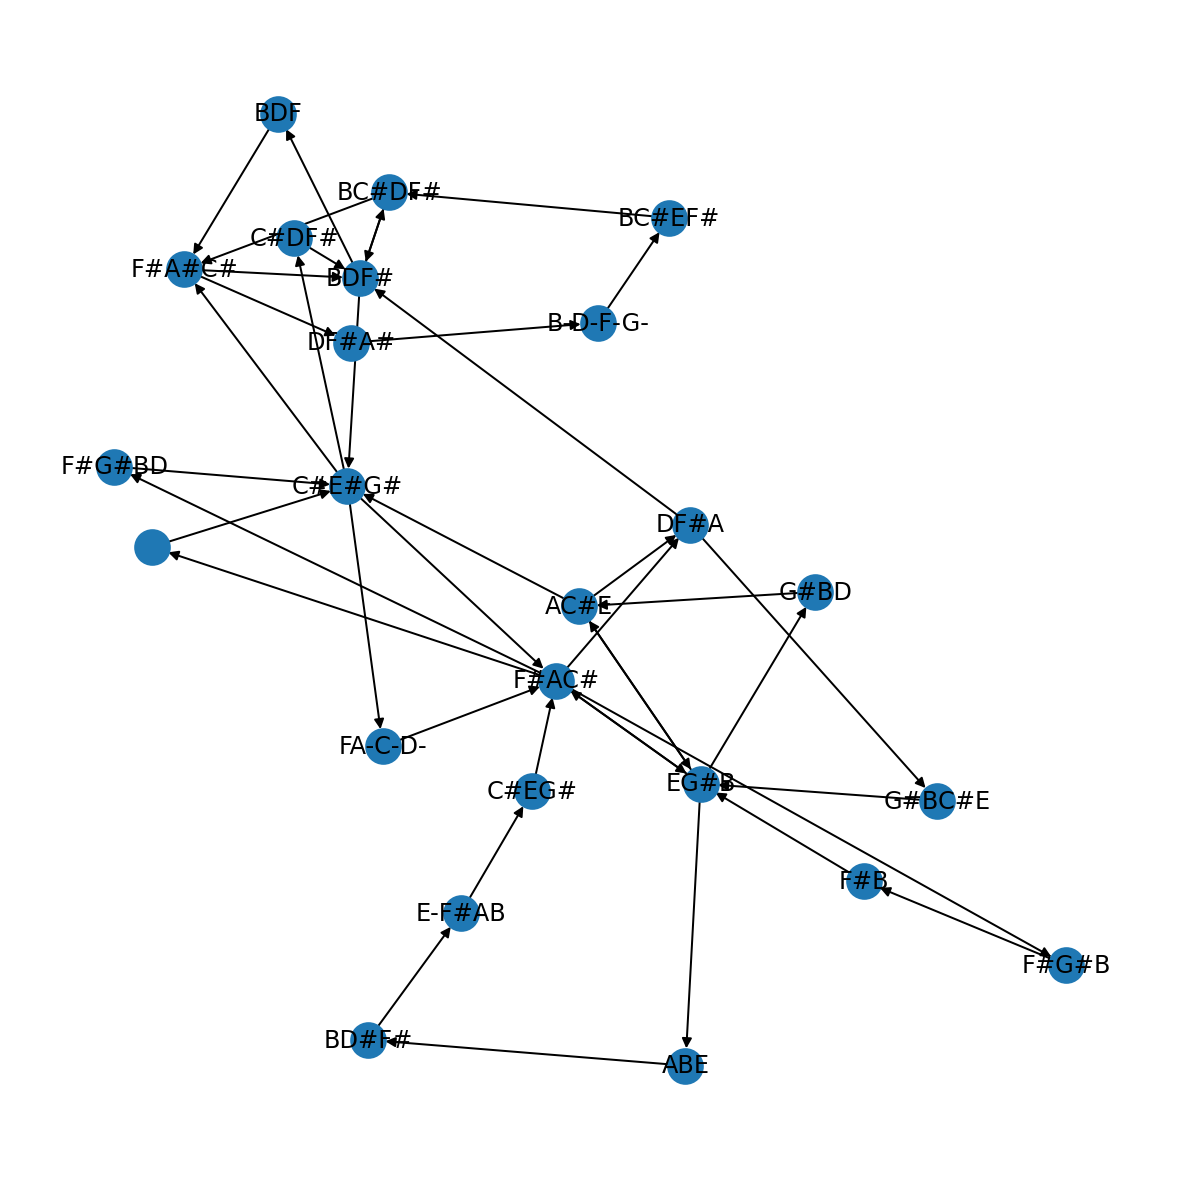

In [4]:
nodes,edges,counts,deg,modul,Gxfull,Gxufull = mk.network(space='score',seq=seq,
                                                         ntx=True,draw=True,general=True,distance='euclidean',
                                                         grphtype='directed')

In [5]:
from musicntwrk.plotting.plotOpsHistogram import plotOpsHistogram
from musicntwrk.utils.opsHistogram import opsHistogram
from musicntwrk.utils.generalizedOpsHistogram import generalizedOpsHistogram

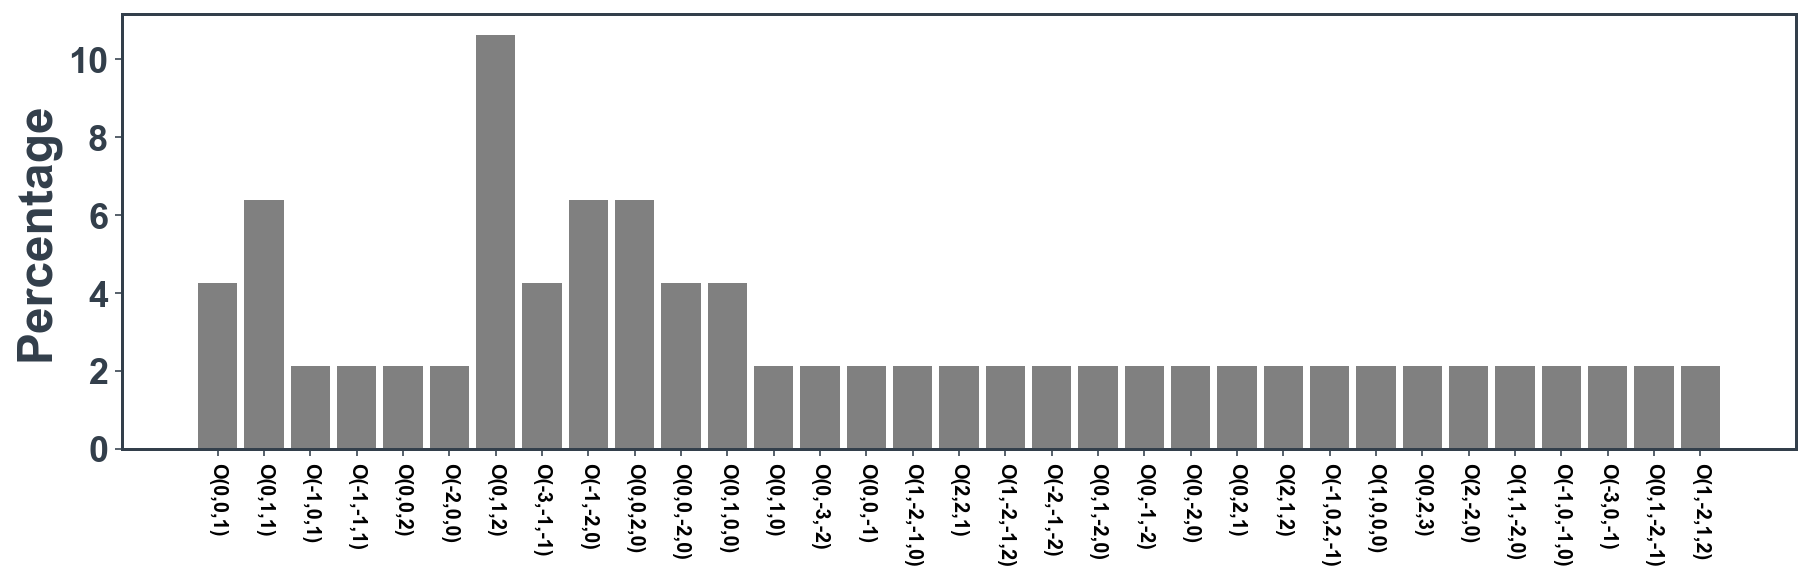

In [44]:
values = edges['Label'].value_counts().keys().tolist()
counts = edges['Label'].value_counts().tolist()
counts /= np.sum(counts)*0.01

newvalues, newcounts,pal_dict,dist = generalizedOpsHistogram(values,counts)
idx = np.argwhere(newcounts)

plotOpsHistogram(newvalues[idx][:,0],newcounts[idx][:,0])

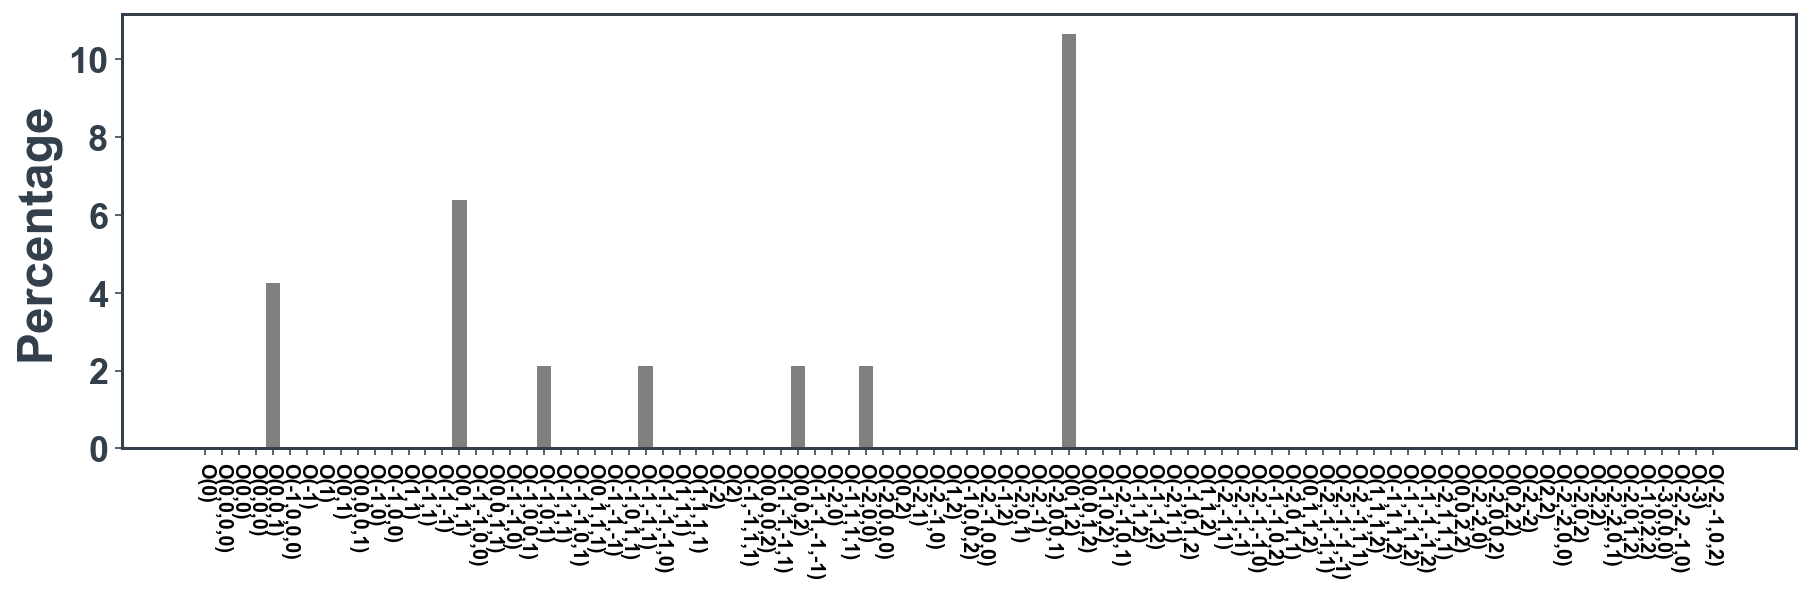

In [48]:
plotOpsHistogram(newvalues[:90],newcounts[:90])

In [3]:
dictrtm,_ = mk.dictionary(space='rhythmP',N=6,Nc=3,REF='s')

In [5]:
dictrtm,_ = mk.dictionary(space='rhythm',Nc=3,a=['q','q','e','e','ed','s'],REF='s')

In [6]:
nodesr,edgesr = mk.network(space='rLead',dictionary=dictrtm,thup=50,thdw=0.1,
                         distance='euclidean',prob=1,write=False)

In [8]:
nodes,edges = mk.network(space='rhythm',dictionary=dictrtm,thup=50,thdw=0.1,
                         distance='euclidean',prob=1,write=False)

In [5]:
dictpcs,_ = mk.dictionary(space='pcs',Nc=3,order=0)

In [8]:
nodesv,edgesv = mk.network(space='vLead',dictionary=dictpcs,thup=3.1,thdw=1.1,
                         distance='euclidean',prob=1,write=False,vector=True)

In [5]:
nodesop,edgesop = mk.network(space='vLead',dictionary=dictpcs,name='O(1)',
                         distance='euclidean',prob=1,write=False,ops=True)

In [6]:
nodesopv,edgesopv = mk.network(space='vLead',dictionary=dictpcs,name='O(1)',
                         distance='euclidean',prob=1,write=False,ops=True,vector=True)

In [ ]:
nodes_ego,edges_ego,edges_alters = mk.network(space='pcsEgo',label='3-1',
                                            dictionary=dictpcs,thup_e=3.0,thdw_e=0.1,thup=3.1,thdw=1.1,
                                            distance='euclidean')

In [ ]:
nodes_ego,edges_ego,edges_alters = mk.network(space='pcs',
                                            dictionary=dictpcs,thup_e=3.0,thdw_e=0.1,thup=3.1,thdw=1.1,
                                            distance='euclidean')

In [5]:
dictionary,_ = mk.dictionary(space='pcs',Nc=3,order=1,row=True,a=[0,3,7,9,11])

In [6]:
dictionary

,class,pcs,interval
0,3-1,"[0,0,0]","[0,0,0,0,0,0]"


In [7]:
musicntwrk.PCSet([0,3,7]).intervalVector()

array([0, 0, 1, 1, 1, 0])

/Applications/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


normalized sound decay constant =  0.029
spectral centroid =  3001.417003448332
spectral bandwidth =  2809.3448556255225


/Applications/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


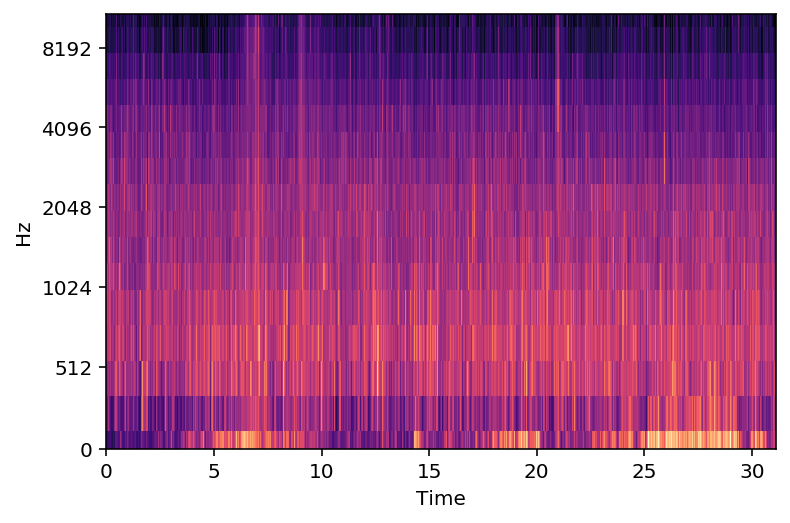

In [4]:
from musicntwrk.data.analyzeTimbre import analyzeTimbre
file = '/Users/marco/Dropbox (Personal)/Musica/Works/untitled (four.feel.titles.words)/Dew.Rust.Light.Flow/IMG_2191.m4a'
nseq,beat,prob,mfcc = analyzeTimbre(file,outlist=['nseq','beat','prob','mfcc'],
                              plot=False,crm=True,tms=True,xml=False)

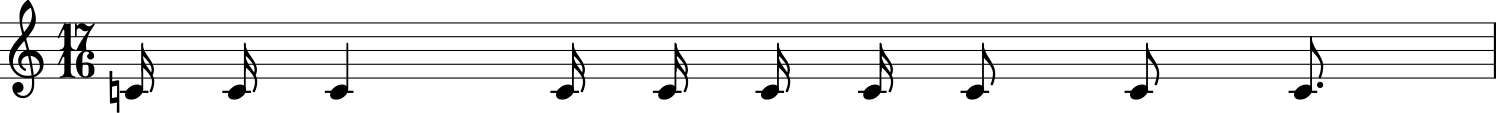

In [13]:
musicntwrk.RHYTHMSeq(beat.rseq[:10]).displayRhythm(xml=False)

In [14]:
from musicntwrk.data.WRITEscoreNoTime import WRITEscoreNoTime
WRITEscoreNoTime(musicntwrk.PCSet(np.flip(nseq.pcs[90:120]+68),UNI=False,ORD=False).pcs,np.flip(beat.rseq[0:30]*4),
                 w=True)

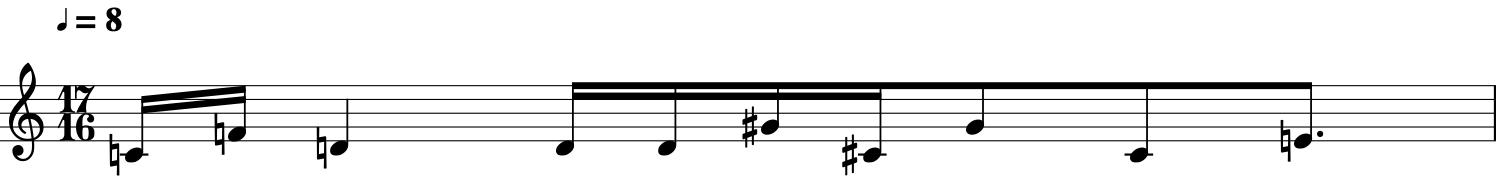

In [18]:
from musicntwrk.data.WRITEscore import WRITEscore
WRITEscore(file,nseq.pcs[:10],beat.rseq[:10],w=True)

In [9]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv("flux treeline Dolomites 2000.csv")
pdt = np.asarray(data)[4170:4230,2]
np.savetxt('flux.dat',pdt)